In [5]:
import torch

In [8]:
class test_save_tensor():
    def __init__(self) -> None:
        pass
    
    def save_tensor_to_file(self, tensor, filename='tensors/sample_tensor.pt'):
        """
        Save a PyTorch tensor to a file.

        Args:
        - tensor: PyTorch tensor to be saved.
        - filename: Name of the file to save the tensor to.
        """
        try:
            torch.save(tensor, filename)
            print(f"Tensor saved successfully to {filename}")
        except Exception as e:
            print(f"Error occurred while saving tensor: {e}")
    
    def gene_tensor(self):
        t = torch.rand(2,2)
        self.save_tensor_to_file(t)
        return t

In [9]:
a = test_save_tensor()

In [10]:
a.gene_tensor()

Tensor saved successfully to tensors/sample_tensor.pt


tensor([[0.0859, 0.1586],
        [0.8222, 0.4262]])

## visualization of tensor

In [1]:
import torch
import matplotlib.pyplot as plt

In [13]:
bev_current = torch.load('../tensor_saved.pt')
# bev_current = bev_current.to(cpu)

In [3]:
bev_current.size()

torch.Size([1, 512, 180, 180])

In [6]:
bev_current[0][0].size()

torch.Size([180, 180])

In [4]:
def visualize_2d_tensor(tensor):
    plt.imshow(tensor.numpy(), cmap='gray')
    plt.title("2D Tensor Visualization")
    plt.colorbar()
    plt.show()

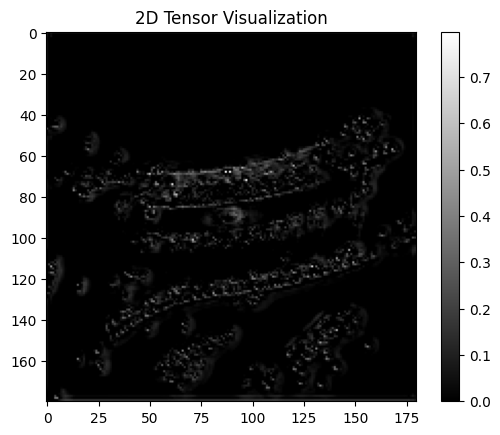

In [15]:
visualize_2d_tensor(bev_current[0][0].cpu())

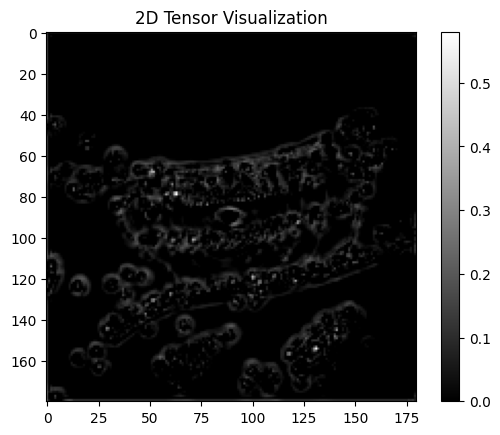

In [16]:
visualize_2d_tensor(bev_current[0][1].cpu())

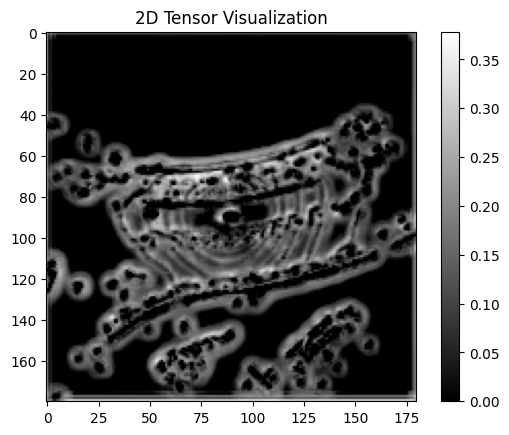

In [17]:
visualize_2d_tensor(bev_current[0][2].cpu())

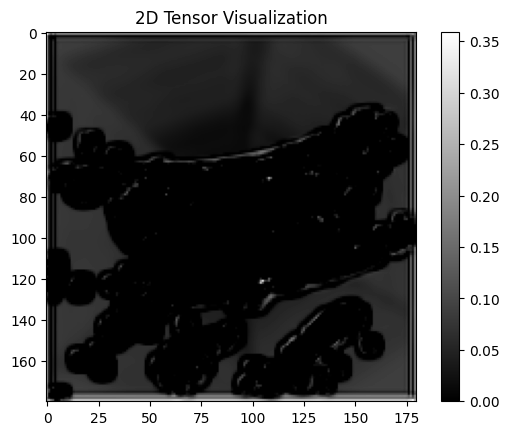

In [18]:
visualize_2d_tensor(bev_current[0][4].cpu())

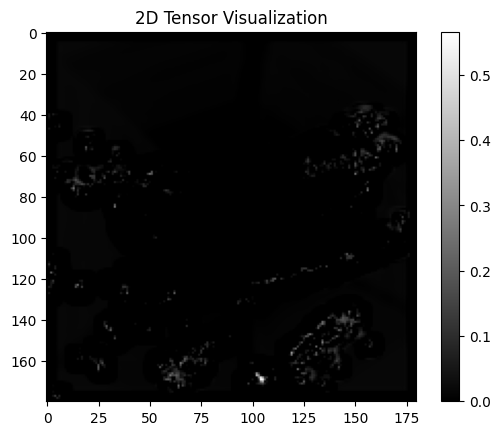

In [20]:
visualize_2d_tensor(bev_current[0][5].cpu())

In [22]:
img = torch.load('../30e55a3ec6184d8cb1944b39ba19d622_img.pt')

In [23]:
img.size()

torch.Size([2, 6, 3, 256, 704])

In [25]:
plt.imshow(img[0][0].permute(1, 2, 0).cpu().numpy())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


ValueError: Unsupported dtype

<Figure size 640x480 with 1 Axes>

In [27]:
bev_after_temporal = torch.load('../30e55a3ec6184d8cb1944b39ba19d622_bev_after_temporal.pt')

In [29]:
bev_after_temporal[0].size()

torch.Size([1, 512, 180, 180])

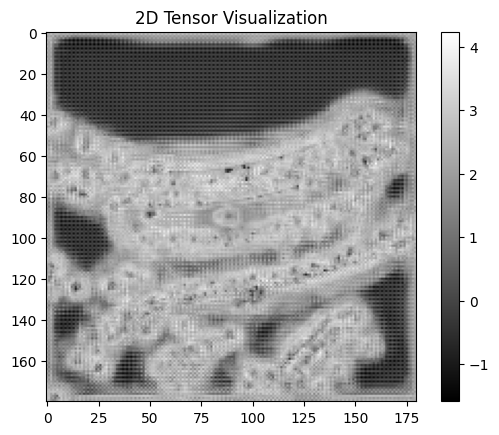

In [34]:
visualize_2d_tensor(bev_after_temporal[0][0][1].cpu())

In [35]:
bev_after_transfusion = torch.load('../save_tensors/30e55a3ec6184d8cb1944b39ba19d622_bev_after_transfusion.pt')

In [36]:
bev_after_transfusion.size()

torch.Size([1, 128, 200])

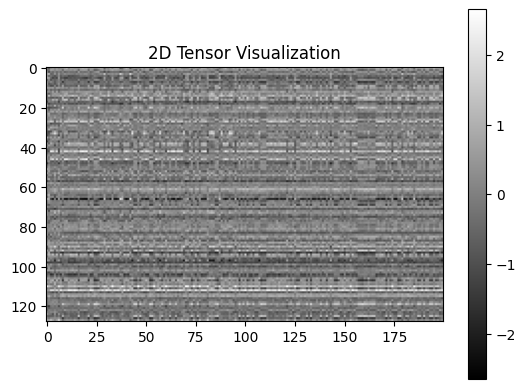

In [37]:
visualize_2d_tensor(bev_after_transfusion[0].cpu())

In [41]:
bev_after_transfusion.argmin()

tensor(13220, device='cuda:0')

In [40]:
bev_after_transfusion.max()

tensor(2.6568, device='cuda:0')

## Visualize point cloud

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
file_name = '/data_from_host/shared/datasets/nuscenes/nuscenes_full_with_prev_next_container_bevfusion_new/samples/LIDAR_TOP/n015-2018-07-11-11-54-16+0800__LIDAR_TOP__1531281439800013.pcd.bin'

In [4]:
pc = np.frombuffer(open(file_name, 'rb').read(), dtype=np.float32)

In [5]:
pc = pc.reshape(-1, 5)
pc = pc[:, :4]

In [6]:
x, y, z, intensity = pc.T

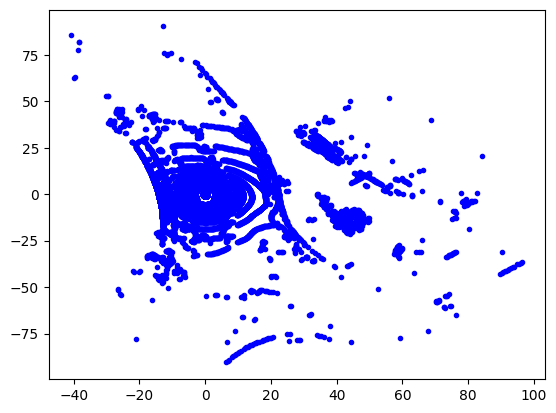

In [7]:
plt.plot(x, y, 'b.')
plt.show()

In [49]:
# normalization
pc_range = 100
x = x / pc_range # -1 to +1
y = y / pc_range

In [50]:
# config output image
img_size = 1024
img = np.zeros((img_size, img_size, 3), np.uint8)

In [2]:
# scale and move to center
x = x * img_size / 2 + img_size / 2
y = y * img_size / 2 + img_size / 2

NameError: name 'x' is not defined

In [52]:
for ix, iy, iz in zip(x, y, z):
    ix = int(ix)
    iy = int(iy)
    
    # keep points that are in the range
    if ix >= 0 and ix < img_size and iy >= 0 and iy < img_size:
        alpha = min(1, max(0, ((iz+5) / 2)))
        color = alpha * 255
        img[iy, ix] = color, color, color

In [53]:
cv2.imshow('pc', img)
cv2.waitKey(0)
cv2.destroyAllWindows() # dont click close, just type anything on keyborad

: 